In [3]:
import numpy as np
from scipy.fft import fft, ifft

import matplotlib.pyplot as plt
%matplotlib inline


fname = r'C:\Users\joshs\Documents\Open Ephys\DataFiles\continuous\chirps_16_channels_At40KHz\continuous2.dat'

data = np.memmap(fname, dtype='int16')
data = np.reshape(data, ((data.size//16, 16)))

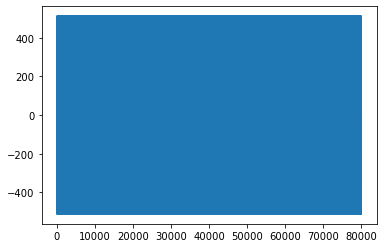

In [146]:
plt.plot(data[:,-1])

In [148]:
40000/5

8000.0

In [177]:
winLen = 0.25
downsample_factor = 10


Fs = 40000 / downsample_factor

freqStart = 4
freqEnd = 1000

nfft = int(winLen * Fs) 

interpRatio = 1

freqStep = 1.0 / float(winLen * interpRatio)

nFreqs = int((freqEnd - freqStart) / freqStep) + 1

nfft

1000

In [178]:
hann = np.zeros((nfft,))
sinWave = np.zeros((nfft,))
cosWave = np.zeros((nfft,))

waveletArray = []

nSampWindow = Fs * winLen

for position in range(nfft):

    if position <= nSampWindow / 2:
        
        hann[position] = pow(np.sin(np.pi * position / nSampWindow + (np.pi / 2)), 2)
        
    elif position <= (nfft - nSampWindow / 2):
        
        hann[position] = 0;
        
    else:
        
        hannPosition = position - (nfft - nSampWindow / 2)
        
        hann[position] = pow(np.sin(np.pi * hannPosition / nSampWindow), 2)

freqNormalized = freqStart

for freq in range(nFreqs):
    
    for position in range(nfft):
        
        sinWave[position] = np.sin(position * freqNormalized * (2 * np.pi) / Fs)
        cosWave[position] = np.cos(position * freqNormalized * (2 * np.pi) / Fs)
    
    freqNormalized += freqStep
    
    waveletBuffer = cosWave * hann + 1j * sinWave * hann

    fftComplex = fft(waveletBuffer)

    waveletArray.append(fftComplex)
    
    #stop


In [181]:
freqStep

4.0

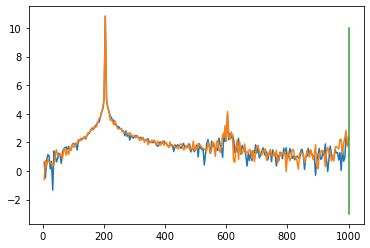

In [190]:
from scipy.signal import decimate

target_frequencies = np.linspace(10,1000,16)

ch = 15


for startPt in np.arange(0, 10001, 10000): 
    
    endPt = startPt + int(nSampWindow * downsample_factor)

    long_snip = data[startPt:endPt, ch]
    snip = np.zeros((len(long_snip) // downsample_factor,)) #decimate(data[startPt:endPt, ch], 20, ftype='fir')
    
    dsf = 2
    for i in range(len(long_snip) // downsample_factor):
        snip[i] = np.mean(long_snip[i*dsf:i*dsf+dsf])
    
    fftBuffer = fft(snip)

    nWindow = Fs * winLen;

    power = np.zeros((nFreqs,nfft))
    p2 = np.zeros((nFreqs,))
    spectrum = np.zeros((nFreqs,nfft))
    iBuff = np.zeros((nfft,),dtype=np.cdouble)
    
    for freq in range(nFreqs):

        for n in range(nfft):
            
            iBuff[n] = np.imag(fftBuffer[n]) * waveletArray[freq][n]

        iBuff = ifft(iBuff)
        
        for n in range(nfft):
        
            complex = np.imag(iBuff[n])
            
            complex *= pow( 2 / nWindow, 0.5) / nfft

            spectrum[freq,n] = complex

            power[freq,n] = np.abs(spectrum[freq,n])
        
        p2[freq] = np.abs(fftBuffer[freq]) **2

    freqs = np.linspace(freqStart, freqEnd, nFreqs)
    
   # pts = np.logspace(0,1000)

    plt.plot(freqs, np.log10(p2)) #np.mean(power,1)))
    #plt.semilogy(freqs, p2, 'k')
    
plt.plot([target_frequencies[ch], target_frequencies[ch]], [-3,10])


In [168]:
nSampWindow * downsample_factor

10000.0

In [65]:
np.logspace(0,3)

array([   1.        ,    1.1513954 ,    1.32571137,    1.52641797,
          1.75751062,    2.02358965,    2.32995181,    2.6826958 ,
          3.0888436 ,    3.55648031,    4.09491506,    4.71486636,
          5.42867544,    6.25055193,    7.19685673,    8.28642773,
          9.54095476,   10.98541142,   12.64855217,   14.56348478,
         16.76832937,   19.30697729,   22.22996483,   25.59547923,
         29.47051703,   33.93221772,   39.06939937,   44.98432669,
         51.79474679,   59.63623317,   68.6648845 ,   79.06043211,
         91.0298178 ,  104.81131342,  120.67926406,  138.94954944,
        159.98587196,  184.20699693,  212.09508879,  244.20530945,
        281.1768698 ,  323.74575428,  372.75937203,  429.19342601,
        494.17133613,  568.9866029 ,  655.12855686,  754.31200634,
        868.51137375, 1000.        ])

In [75]:
499 *2

998

In [88]:
5 / pow(2,16)

7.62939453125e-05

In [89]:
3.3 / pow(2,16)

5.035400390625e-05

In [26]:


test_data = np.zeros((80000,16), dtype='int16')

In [28]:
t = np.tile(np.linspace(0, 2*np.pi, 40000), (1,2))

for i, fr in enumerate(freqs):
    
    test_data[:,i] = np.sin(t*fr) * 100 / 0.195

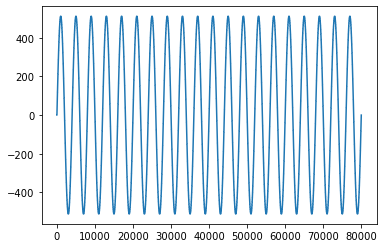

In [73]:
plt.plot(test_data[:,0])

In [76]:
fname = r'C:\Users\joshs\Documents\Open Ephys\DataFiles\continuous\chirps_16_channels_At40KHz\continuous2.dat'

test_data.tofile(fname)

In [87]:
print(waveletArray[247][0])

(-2.9531932455029164e-14-2.523464566048466e-13j)


In [191]:
2 * 64 * 256

32768